# Network Intrusion Data Analysis
The following dataset analysis is completed with the goal of creating a model on detecting possible network anomalies
We will be performing this analysis on the following dataset (https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection/data)
This dataset contains TCP/IP dump data for a number of simulated network intrusions on a network setup like a typical AirForce LAN


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### Data Pre Processing
Our dataset contains 42 columns describing data collected from networks of different types
We will be examining the data to learn about the different columns and find any redundant columns

In [4]:
# Load the train and test data from the csv
train_data = pd.read_csv("Train_data.csv")
train_data.head() # display the first 5 data samples

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test_data = pd.read_csv("Test_data.csv")
test_data.head() # display the first 5 data samples

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [6]:
#View different data types in the train data
train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
train_data = train_data.rename(columns={'class': 'label'})

In [8]:
# View datatypes for the test data
test_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
# View unique values for columns with object data types
train_data.describe(include='object')

,protocol_type,service,flag,label
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [11]:
# Find the number of missing values in the train data
total = train_data.shape[0]
missing_columns = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

# There are no missing values

In [12]:
# See if there are any duplicate rows in the train data
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
# Check unique values in num_outbound_cmds column
train_data.num_outbound_cmds.unique()

array([0], dtype=int64)

In [14]:
# The column 'num_outbound_cmds' has only one unique value, so we can drop it
train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

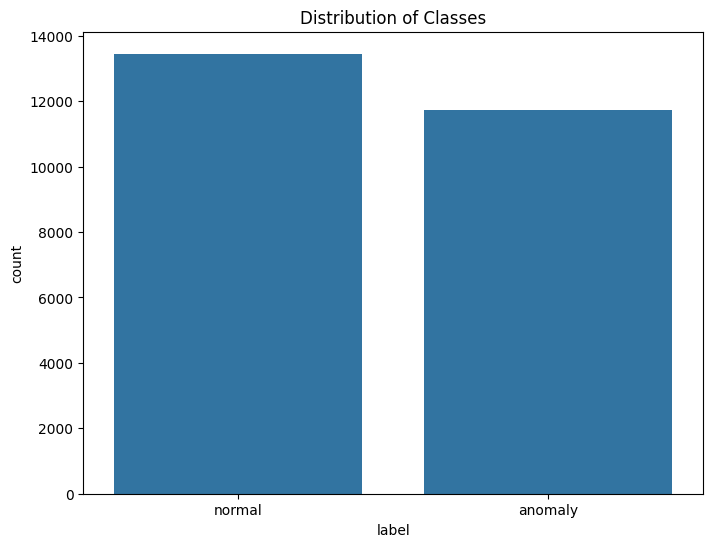

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Classes')
plt.show()
# here we can see that roughly 12 thousand samples are 0, these data samples are classified as network intrusion
# we see that almost 14 thousand samples are not classified as network intrusion

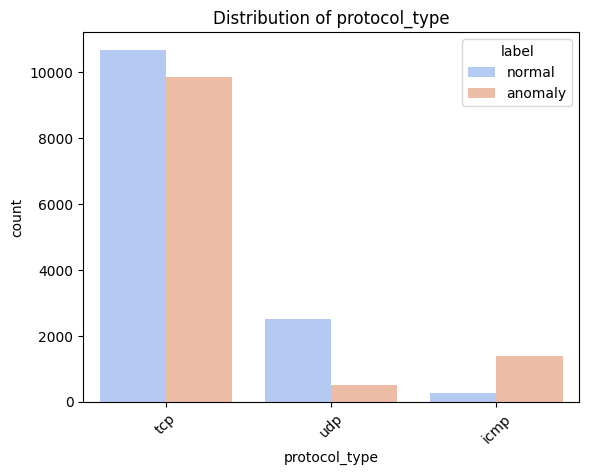

In [34]:
# categorical columns
for category in ['protocol_type']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train_data, hue='label', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

Internet Control Message Protocol (ICMP) is used for reporting errors and performing network diagnostics.
Many ICMP attacks: ICMP Redirect Attack, ICMP Flood attack

In [20]:
X_train = train_data.drop(columns=['label'])  # Features
y_train = train_data['label']  # Target

In [21]:
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])

In [22]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("test Accuracy:", val_accuracy)

Validation Accuracy: 0.9974201230402858


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

test_accuracy = best_rf_model.score(X_val, y_val)
print("Test accuracy:", test_accuracy)

print("Best hyperparameters:", grid_search.best_params_)


Test accuracy: 0.9974201230402858
Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC



rf_parameters = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5, scoring='accuracy')

svm_parameters = {'C': [0.1, 1, 10],'gamma': [0.1, 0.01, 0.001],'kernel': ['linear', 'rbf']} #Dict
svm = SVC(random_state=42) #Create classifier
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_parameters , cv=5, scoring='accuracy')

gb_parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 10]}
gb = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_parameters, cv=5, scoring='accuracy')
#Instantiate the GridSearchCV objects


rf_grid_search.fit(X_train, y_train) #Fit the grid search for each classifier
svm_grid_search.fit(X_train, y_train) 
gb_grid_search.fit(X_train, y_train)


best_rf_model = rf_grid_search.best_estimator_ #Get best models for each classifier
best_svm_model = svm_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

rf_test_accuracy = best_rf_model.score(X_val, y_val)
svm_test_accuracy = best_svm_model.score(X_val, y_val)
gb_test_accuracy = best_gb_model.score(X_val, y_val)

print("Random Forest Test accuracy:", rf_test_accuracy) #Accuracy
print("SVM Test accuracy:", svm_test_accuracy)
print("Gradient Boosting Test accuracy:", gb_test_accuracy)

print("Random Forest Best hyperparameters:", rf_grid_search.best_params_) #Best param
print("SVM Best hyperparameters:", svm_grid_search.best_params_)
print("Gradient Boosting Best hyperparameters:", gb_grid_search.best_params_)
